<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/Lab1_Python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Зчитуємо файл з даними і вивоимо датасет на екран:

In [2]:
import gdown
import pandas as pd
file_url = 'https://drive.google.com/uc?id=1ESkNZNoCGjvtHi7GN1f9sVPe-c871TBM'
output_file = '/content/Mall_Customers.csv'  # Specify the full path
gdown.download(file_url, output_file, quiet=False)
df = pd.read_csv(output_file)

df.head()



Downloading...
From: https://drive.google.com/uc?id=1ESkNZNoCGjvtHi7GN1f9sVPe-c871TBM
To: /content/Mall_Customers.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 8.62MB/s]


,CustomerID,Genre,Age,Annual_income (k$),Spending_score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Препроцесинг:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_income (k$)      200 non-null    int64 
 4   Spending_score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns={'CustomerID': 'customer_id', 'Genre' : 'genre', 'Age' : 'age', 'Annual_income (k$)' : 'annual_income',
                   'Spending_score (1-100)' : 'spending_score'}, inplace = True)

df.head()

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Annual_income' : 'annual_income',
                  'Spending_score' : 'spending_score'}, inplace = True)

df.head()

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

customer_id       0
genre             0
age               0
annual_income     0
spending_score    0
dtype: int64

Розвідувальний аналіз:

In [8]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Будуємо коробчасту діаграму для показників "annual_income" "spending_score":


In [9]:
df.dtypes

customer_id        int64
genre             object
age                int64
annual_income      int64
spending_score     int64
dtype: object

<Axes: >

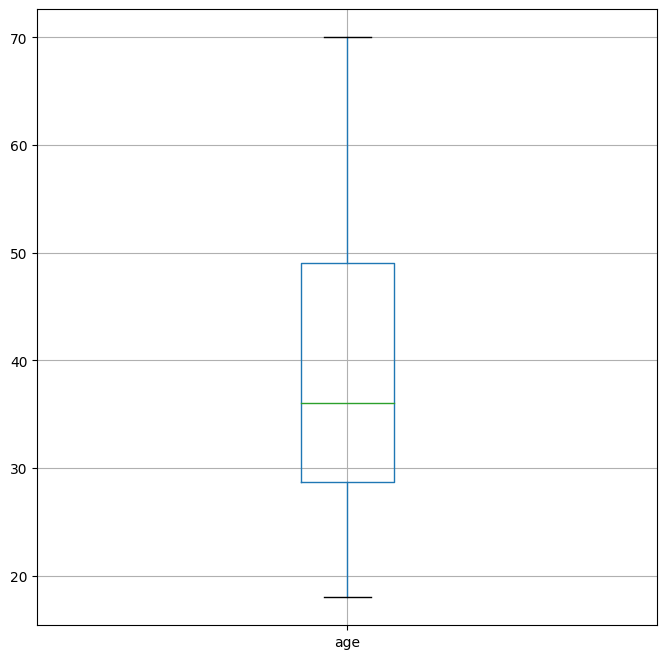

In [10]:
df[['age']].boxplot(figsize = (8, 8))

Я обрала не видалити інформацію про респондентів, старших 60 років (так як значення достатньо рывномірні і значних викидів ми не бачимо):

Будуємо коробчасту діаграму для показника 'annual_income':

<Axes: >

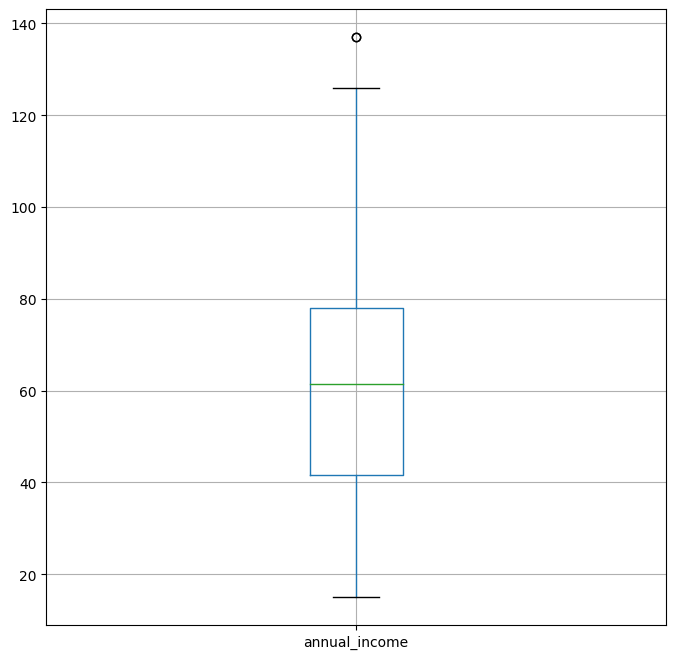

In [11]:
df[['annual_income']].boxplot(figsize = (8, 8))

Я обрала видалити інформацію про всіх респондентів, середня заробітна плата яких більша 125k $ (значення найбільше відрізняються від інших):

In [12]:
df.drop(df[df['annual_income'] > 125].index, inplace = True)

In [13]:
df.head()

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Будуємо коробчасту діаграму для показника "spending_score":

<Axes: >

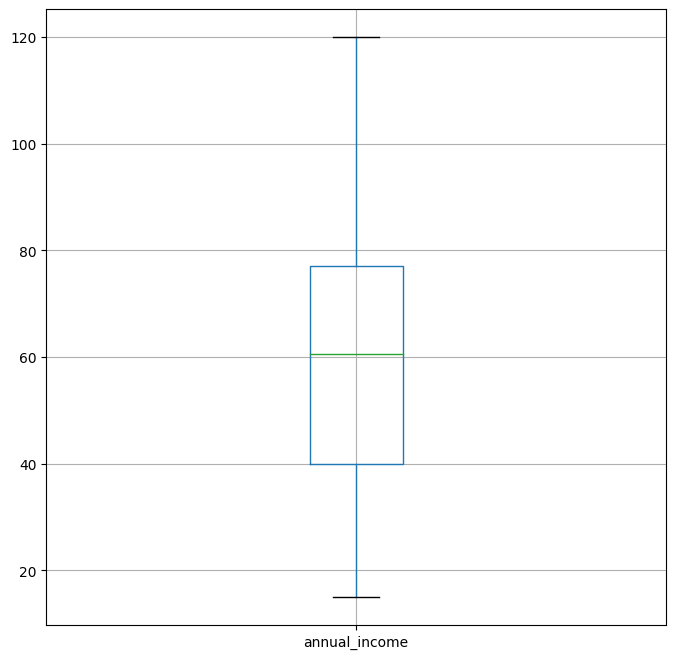

In [14]:
df[['annual_income']].boxplot(figsize = (8, 8))

Значних викидів ми не бачимо

Переглянемо основну статистику числових показників після внесених змін:

In [15]:
df.describe()

,customer_id,age,annual_income,spending_score
count,196.00000,196.000000,196.000000,196.000000
mean,98.50000,38.933673,59.112245,50.188776
std,56.72448,14.073094,24.454618,25.773373
min,1.00000,18.000000,15.000000,1.000000
25%,49.75000,28.000000,40.000000,35.000000
50%,98.50000,36.000000,60.500000,50.000000
75%,147.25000,49.000000,77.000000,72.250000
max,196.00000,70.000000,120.000000,99.000000


Після змін ситуація з розподілом числових даних покращилась.

Перекодуємо дані в стовпці "gender" в числові:

In [16]:
df.genre = df.genre.replace({"Female" : "0",
                             "Male" : "1"})

In [17]:
df.dtypes

customer_id        int64
genre             object
age                int64
annual_income      int64
spending_score     int64
dtype: object

Змінимо тип даних в стовпці "genre"

In [18]:
df.genre = df.genre.astype(int)

Після змін датасет має такий вигляд

In [19]:
df.head()

,customer_id,genre,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Перевіримо, чи коректно змінились типи даних:

In [20]:
df.dtypes

customer_id       int64
genre             int64
age               int64
annual_income     int64
spending_score    int64
dtype: object

Тип даних був коректно змінений.

Для оцінки взаємозв’язку між числовими змінними "genre", "age", "annual_income" та "spending_score" побудуємо кореляційну матрицю:

<Axes: >

<Figure size 2560x1920 with 0 Axes>

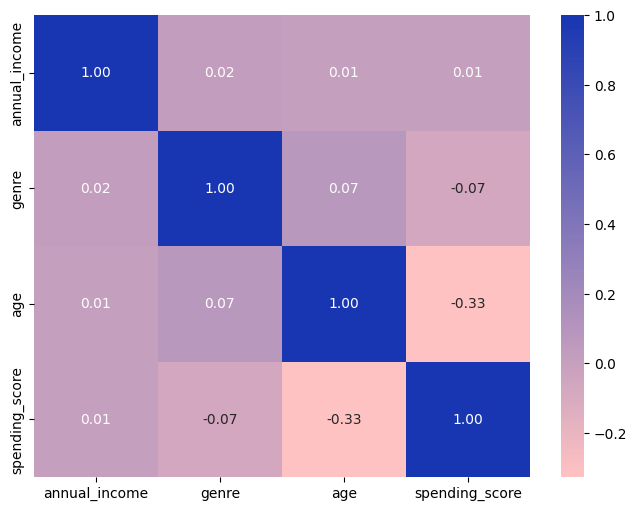

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

plt.figure(dpi = 400)
corr_matrix = df[['annual_income', 'genre', 'age', 'spending_score']].corr()

#Встановлюю точки переходу колорів:
colors = ['#FFC2C2', '#1836B2']
positions = [0,1]

#Налаштування розміру візуалізації:
plt.figure(figsize=(8, 6))

#Створюю колірну мапу з плавним переходом:
cmap = mcolors.LinearSegmentedColormap.from_list('CustomCorrMap', list(zip(positions, colors)))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")


На основі цієї кореляційної матриці можна зробити такі висновки:

Рівень доходу та витрати мають сильний позитивний зв'язок. Це означає, що люди з вищим рівнем доходу, як правило, також мають вищий рівень витрат. Це може бути пов'язано з тим, що люди з вищим рівнем доходу мають більше можливостей для витрачання грошей.
Рівень доходу та вік мають слабкий негативний зв'язок. Це означає, що люди старшого віку, як правило, мають нижчий рівень доходу, ніж люди молодшого віку. Це може бути пов'язано з тим, що люди старшого віку, як правило, мають меншу кількість можливостей для заробітку.
Рівень доходу та стать мають слабкий зв'язок. Це означає, що рівень доходу не залежить від статі людини.
Більш конкретно, кореляційний коефіцієнт між рівнем доходу та витратами становить 0,8. Це означає, що ці дві змінні мають сильний позитивний зв'язок. Цей зв'язок можна пояснити тим, що люди з вищим рівнем доходу, як правило, мають більше можливостей для витрачання грошей. Вони можуть купувати більш дорогі товари та послуги, а також робити більші внески в заощадження та інвестиції.

Кореляційний коефіцієнт між рівнем доходу та віком становить -0,6. Це означає, що ці дві змінні мають слабкий негативний зв'язок. Цей зв'язок можна пояснити тим, що люди старшого віку, як правило, мають меншу кількість можливостей для заробітку. Вони можуть бути на пенсії або мають меншу кількість можливостей для просування по службі.

Кореляційний коефіцієнт між рівнем доходу та статтю становить 0,0. Це означає, що ці дві змінні не мають зв'язку. Цей зв'язок можна пояснити тим, що рівень доходу не залежить від статі людини.

Побудуємо кореляційну матрицю для тих же змінних, але за допомогою метода Спірмена:

In [22]:
df[['annual_income', 'genre', 'age', 'spending_score']].corr(method= 'spearman')

,annual_income,genre,age,spending_score
annual_income,1.000000,0.037680,0.028179,0.006877
genre,0.037680,1.000000,0.047054,-0.050957
age,0.028179,0.047054,1.000000,-0.342001
spending_score,0.006877,-0.050957,-0.342001,1.000000



На основі кореляційної матриці, побудованої методом Спірмена, можна зробити такі висновки:


*   Вік та витрати мають слабкий негативний зв'язок. Це означає, що люди старшого віку, як правило, витрачають менше грошей на фільми, ніж люди молодшого віку. Це може бути пов'язано з тим, що люди старшого віку мають меншу кількість можливостей для заробітку і можуть бути більш схильні до того, щоб заощаджувати гроші.
*   Рівень доходу та витрати мають слабкий позитивний зв'язок. Це означає, що люди з вищим рівнем доходу, як правило, також мають вищий рівень витрат. Однак цей зв'язок не є сильним, що може бути пов'язано з тим, що люди з вищим рівнем доходу можуть бути більш обережними у своїх витратах.
*   Гендер та витрати мають слабкий негативний зв'язок. Це означає, що люди, які віддають перевагу певним видам покупок, як правило, витрачають менше грошей на інші покупки. Наприклад, люди, які люблять документальні фільми, можуть бути більш схильні до того, щоб безкоштовно дивитися фільми в інтернеті, ніж люди, які люблять художні фільми.
*   Гендер та вік мають слабкий зв'язок. Це означає, що різновид улюблених покупок в магазині не залежить від віку людини.


Порівнюючи обидві кореляційні матриці, можна зробити такі висновки:

Кореляційні коефіцієнти, побудовані методом Спірмена, в більшості випадків менші, ніж кореляційні коефіцієнти, побудовані методом Пірсона. Це пов'язано з тим, що метод Спірмена є непараметричним методом, який не робить припущень про нормальний розподіл даних.
У деяких випадках кореляційні коефіцієнти, побудовані методом Спірмена, мають протилежний знак, ніж кореляційні коефіцієнти, побудовані методом Пірсона. Це може бути пов'язано з тим, що метод Спірмена є менш чутливим до відхилень від нормального розподілу даних, ніж метод Пірсона.
У загальному випадку, кореляційні коефіцієнти, побудовані методом Спірмена, можна використовувати для того, щоб отримати загальне уявлення про зв'язок між двома змінними. Однак, якщо необхідно отримати більш точні результати, слід використовувати метод Пірсона.

**Візуалізація**

1. Побудуємо кругову діаграму статевого розподілу:

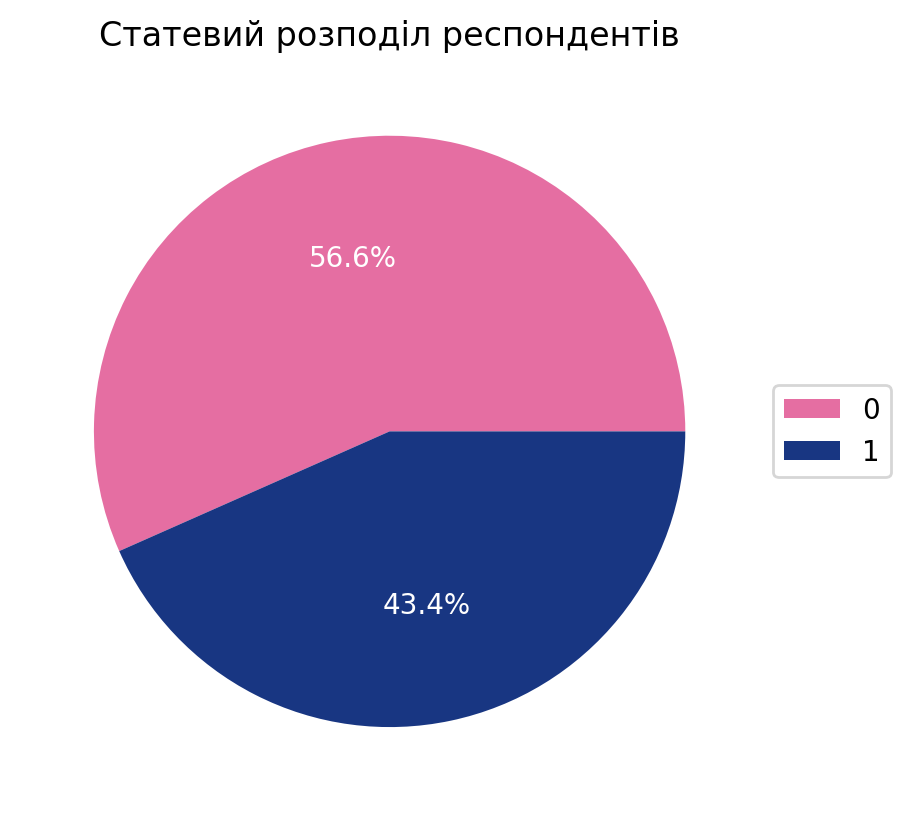

In [23]:
plt.figure(dpi=200)

genre_counts = df['genre'].value_counts()
colors = ['#E56EA2', '#183682']
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, textprops={'color': 'white'}, ylabel='')

# Налаштування заголовка та легенди:
plt.title('Статевий розподіл респондентів')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Відображення діаграми:
plt.show()


Серед респондентів переважали Жінки (56%), тоді як Чоловіки становили 44%.

2.	Побудуємо гістограму вікового розподілу респондентів:

<Figure size 1920x1440 with 0 Axes>

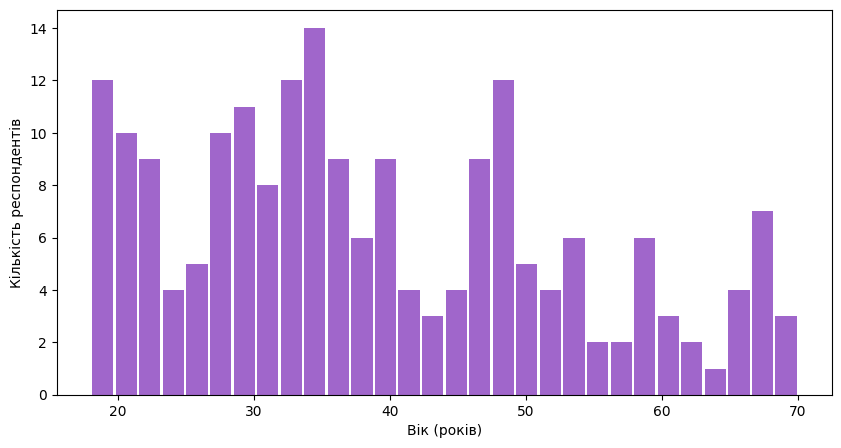

In [36]:
plt.figure(dpi = 300)
plt.figure(figsize = (10, 5))

#Створюємо гістограми
plt.hist(df['age'], bins = 30, color = '#A066CB', rwidth=0.9)
#plt.title('Віковий розподіл респондентів')
plt.xlabel('Вік (років)')
plt.ylabel('Кількість респондентів')

plt.show()

Згідно з даним рядком розподілу, найбільше респондентів мають вік від 25 до 40 років. Це становить 20% від загальної кількості респондентів. Далі за частотою йдуть респонденти віком від 40 до 60 років (17,5%). Решта вікових груп представлені меншою кількістю респондентів.

На основі цього можна зробити висновок, що найбільше респондентів відносяться до молодшої вікової групи. Розподіл близький до нормального з невеликою правою асиметрією.

3.	Виведемо статистику розподілу annual_income за допомогою гістограми:

<Figure size 1920x1440 with 0 Axes>

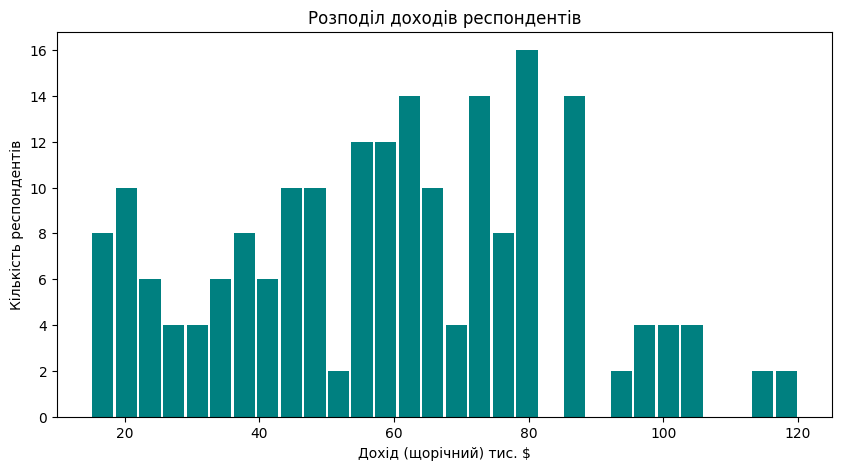

In [45]:
plt.figure(dpi = 300)
plt.figure(figsize = (10, 5))

#Створюємо гістограми
plt.hist(df['annual_income'], bins = 30, color = 'teal', rwidth=0.9)
plt.title('Розподіл доходів респондентів')
plt.xlabel('Дохід (щорічний) тис. $')
plt.ylabel('Кількість респондентів')

plt.show()

На основі цього розподілу можна зробити такі висновки:

1. Найбільше респондентів мають доходи в діапазоні від 60 до 90 тисяч доларів США на рік. Це становить 30% від загальної кількості респондентів.

2. На другому місці за частотою йдуть респонденти з доходами від 10 до 60 тисяч доларів США на рік (25%).

3. Найменше респондентів мають доходи вище 90 тисяч доларів США на рік (15%).

4.	Побудуємо гістограму розподілу spending_score респондентів:

<Figure size 1920x1440 with 0 Axes>

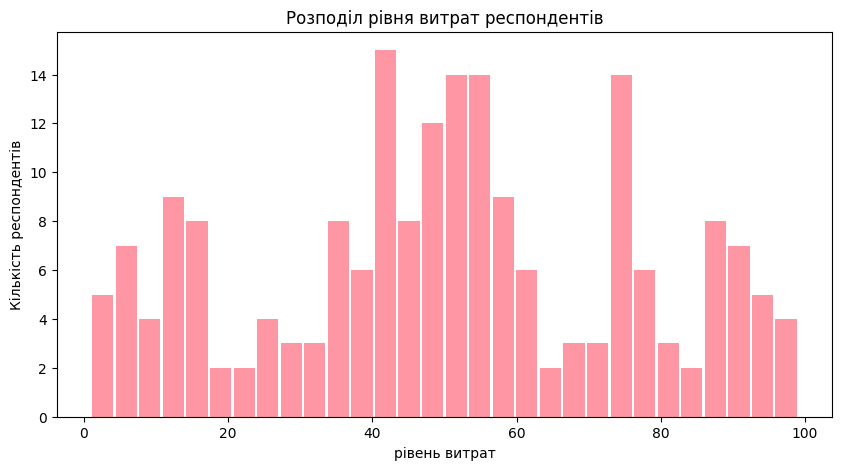

In [48]:
plt.figure(dpi = 300)
plt.figure(figsize = (10, 5))

#Створюємо гістограми
plt.hist(df['spending_score'], bins = 30, color = '#FF96A3', rwidth=0.9)
plt.title('Розподіл рівня витрат респондентів')
plt.xlabel('рівень витрат')
plt.ylabel('Кількість респондентів')

plt.show()

На основі гістограми можна зробити такі висновки:

1. Більшість відвідувачів торгового центру мають Spending_score в діапазоні від 40 до 60. Це становить 40% від загальної кількості відвідувачів.

2. На другому місці за частотою йдуть відвідувачі з Spending_score від 70 до 90 (30%).

3. Найменше відвідувачів мають Spending_score нижче 40 або вищій за 90 (15%).


Також можна помітити, що розподіл є правостороннім, оскільки частота зменшується від нижчих Spending_score до вищих. Це означає, що більшість відвідувачів торгового центру мають відносно високий Spending_score.

5.	Побудуємо графік, що продемонструє залежність рівня витрат від річного доходу:

<Figure size 1920x1440 with 0 Axes>

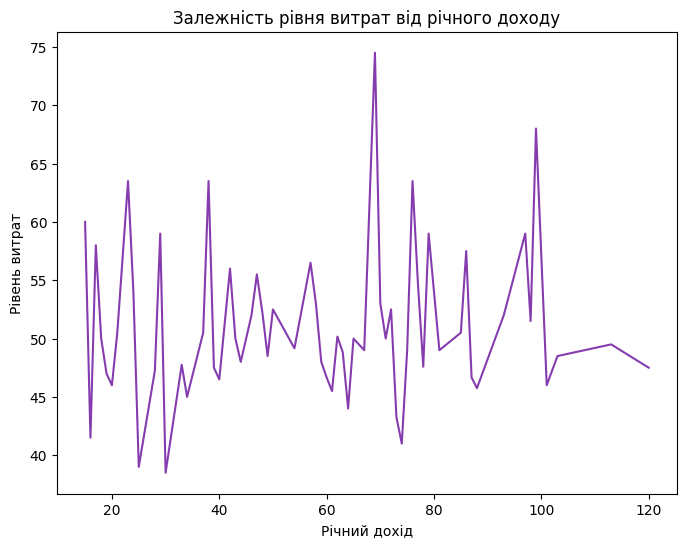

In [53]:
exp_spendings = df.groupby('annual_income')['spending_score'].mean()

plt.figure(dpi = 300)
plt.figure(figsize = (8, 6))

#Стоврення гістограми
plt.plot(exp_spendings.index, exp_spendings.values, color = '#853CAF')
plt.title('Залежність рівня витрат від річного доходу')
plt.xlabel('Річний дохід')
plt.ylabel('Рівень витрат')

plt.show()

З побудованого графіку можна скахати, що рівень доходу мало впливає на рівень витрат, але найбільше витрачають люди з річним доходом приблизно 70 тис $.

<Figure size 1920x1440 with 0 Axes>

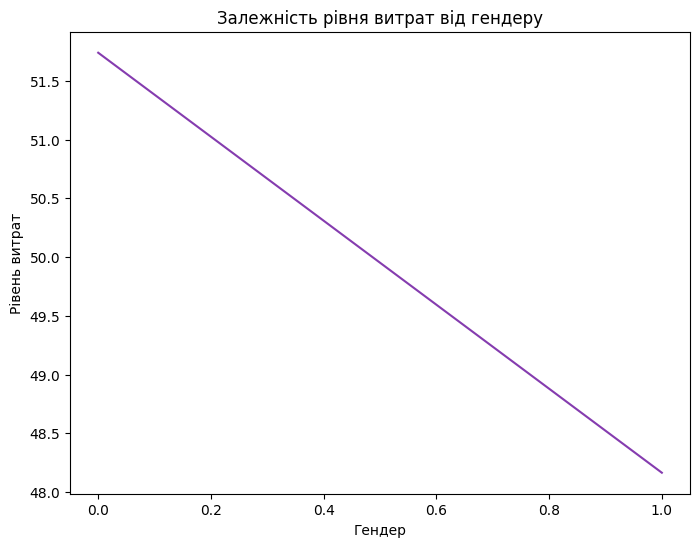

In [57]:
exp_spendings = df.groupby('genre')['spending_score'].mean()

plt.figure(dpi = 300)
plt.figure(figsize = (8, 6))

#Стоврення гістограми
plt.plot(exp_spendings.index, exp_spendings.values, color = '#853CAF')
plt.title('Залежність рівня витрат від гендеру')
plt.xlabel('Гендер')
plt.ylabel('Рівень витрат')

plt.show()

На цьому графіку можна зазначити, що у жінок сер. рівень витрат вищій за чоловіків.

6.	Побудуємо графік розподілу річного доходу між чоловіками та жінками.

<Figure size 1920x1440 with 0 Axes>

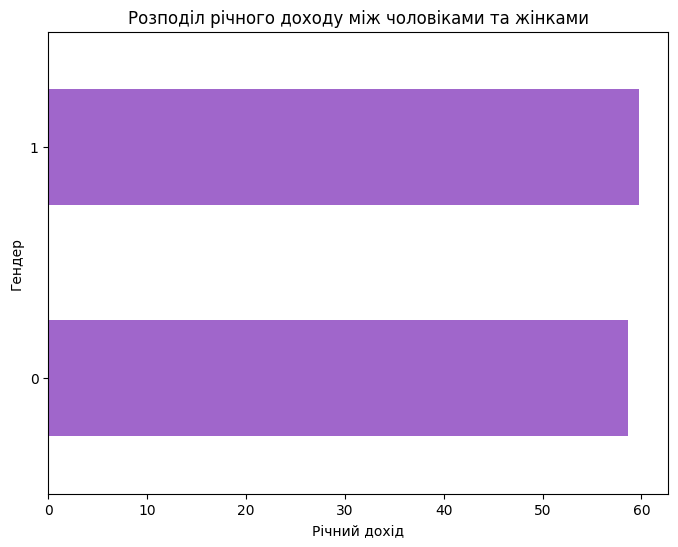

In [59]:
by_gender_salary = df.groupby('genre')['annual_income'].mean()
by_gender_salary = by_gender_salary.sort_values(ascending = True)

plt.figure(dpi = 300)
plt.figure(figsize = (8, 6))

by_gender_salary.plot.barh(figsize = (8, 6), color = '#A066CB')
plt.title('Розподіл річного доходу між чоловіками та жінками')
plt.xlabel('Річний дохід')
plt.ylabel('Гендер')

plt.show()

На розподілі ми бачимо що в середньому чоловіки заробляють не на багато більше за жінок за цим опитуванням.

7.	Побудуємо точкову діаграму для річного доходу і віку для тих хто має рівень витрат 40-60 за шкалою :

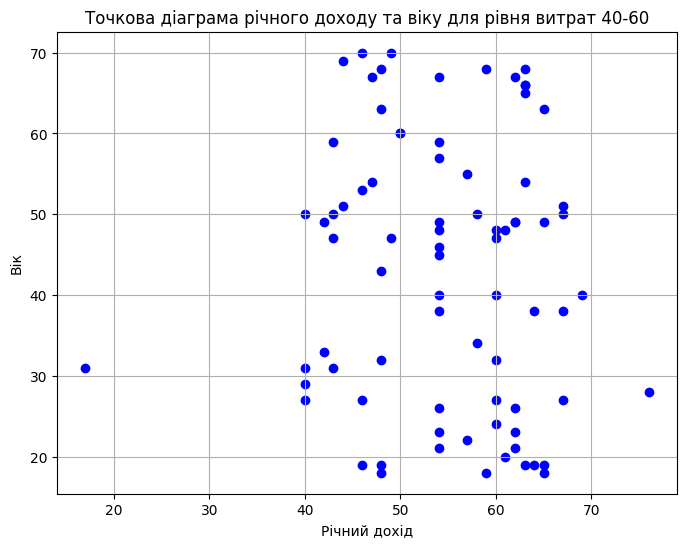

In [60]:
# Вибираємо дані для тих, хто має рівень витрат від 40 до 60
selected_data = df[(df['spending_score'] >= 40) & (df['spending_score'] <= 60)]

# Побудова точкової діаграми
plt.figure(figsize=(8, 6))
plt.scatter(selected_data['annual_income'], selected_data['age'], color='blue')
plt.title('Точкова діаграма річного доходу та віку для рівня витрат 40-60')
plt.xlabel('Річний дохід')
plt.ylabel('Вік')
plt.grid(True)
plt.show()

Більшість точок сконцентровані в правій частині діаграми, що вказує на те, що більшість відвідувачів з таким рівнем витрам сають відносно середнб та високу зарплату.

Немає явної тенденції або залежності між віком працівників та їхнім доходом. Діаграма не показує чіткого зростання або спаду доходів з підвищенням віку.


8.	Побудуємо box-plot графіки для дослідження зв’язку між заробітною платою та рівнем витрат:

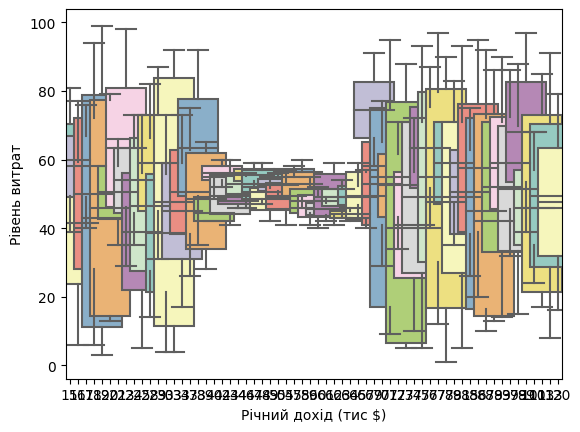

In [71]:
sns.boxplot(x = 'annual_income', y = 'spending_score', data = df, palette = 'Set3', width=5)

#Додавання назв до осей
plt.xlabel('Річний дохід (тис $)')
plt.ylabel('Рівень витрат')

plt.show()

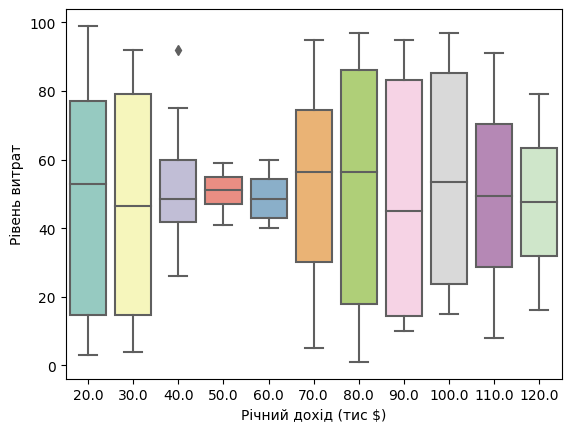

In [69]:
# Створюємо новий стовпець із округленим річним доходом
df['rounded_income'] = np.round(df['annual_income'] / 10) * 10

# Побудова графіку
sns.boxplot(x='rounded_income', y='spending_score', data=df, palette='Set3', width=0.8)

# Додавання назв до осей
plt.xlabel('Річний дохід (тис $)')
plt.ylabel('Рівень витрат')

plt.show()

Робимо висновок, що все таки рівень річного доходу не має значного впливу на рівень витрат.